# Predict the onset of diabetes based on diagnostic measures

## About data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Importing Packages

Here, we import the necessary pandas packages for Machine Learning

In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

## Adding CSV data in our project
Using pandas.read_csv(PATH) function to add csv dataset from our local system

In [2]:
df=pd.read_csv("diabetes.csv")

## Checking Null and missing values

In [3]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
df.isnull().sum().sum()

0

## NN Outlier Detection

kNN is a supervised ML algorithm, when it comes to anomaly detection it takes an unsupervised approach. This is because there is no actual “learning” involved in the process and there is no pre-determined labeling of “outlier” or “not-outlier” in the dataset, instead, it is entirely based upon threshold values. Data scientists arbitrarily decide the cutoff values beyond which all observations are called anomalies (as we will see later).

In [5]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [6]:
X = df.values

In [7]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

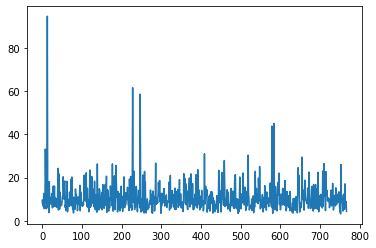

In [8]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [9]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 18)
outlier_index

(array([  8,  13,  18,  40,  43,  53,  57,  62,  73,  75, 106, 111, 120,
        125, 132, 139, 162, 177, 182, 186, 187, 206, 220, 223, 228, 231,
        247, 248, 254, 258, 286, 296, 323, 346, 357, 359, 360, 371, 375,
        388, 392, 409, 445, 453, 458, 459, 485, 486, 487, 498, 506, 519,
        537, 545, 548, 579, 584, 597, 612, 645, 647, 655, 662, 672, 695,
        707, 710, 715, 753], dtype=int64),)

In [10]:
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
18,1,103,30,38,83,43.3,0.183,33,0
40,3,180,64,25,70,34.0,0.271,26,0
43,9,171,110,24,240,45.4,0.721,54,1
...,...,...,...,...,...,...,...,...,...
695,7,142,90,24,480,30.4,0.128,43,1
707,2,127,46,21,335,34.4,0.176,22,0
710,3,158,64,13,387,31.2,0.295,24,0
715,7,187,50,33,392,33.9,0.826,34,1


### Drop Outlier datas

In [11]:
data = df.drop(df.index[outlier_index])

### Checking Pairplot

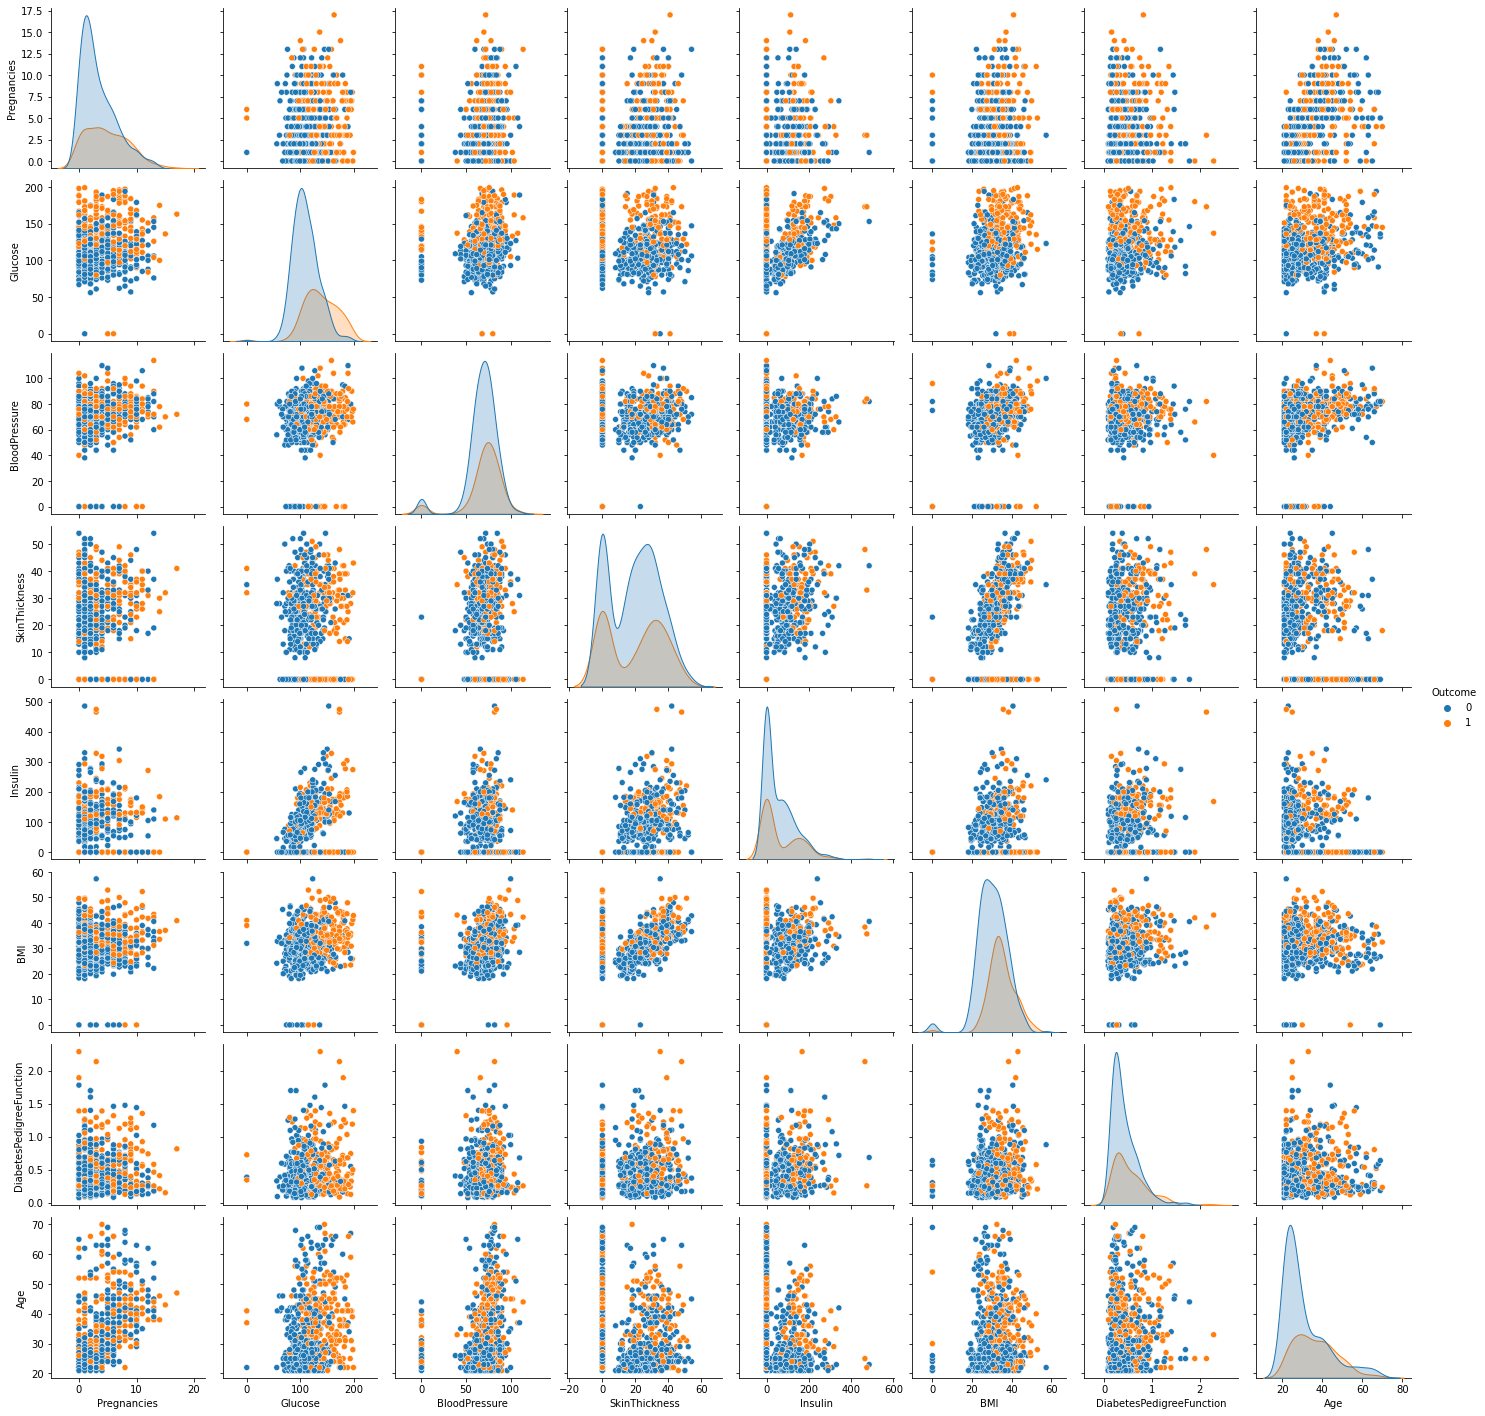

In [12]:
sns.pairplot(data,hue='Outcome')

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,3.836910,118.685265,68.942775,19.432046,61.373391,31.700572,0.461783,32.762518,0.329041
std,3.323832,29.742369,19.052473,15.546838,82.082158,7.586935,0.317317,11.256108,0.470202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.240500,24.000000,0.000000
50%,3.000000,114.000000,72.000000,22.000000,0.000000,32.000000,0.364000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,113.000000,36.100000,0.611000,40.000000,1.000000
max,17.000000,199.000000,114.000000,54.000000,485.000000,57.300000,2.288000,70.000000,1.000000


## Correlation with Heatmap

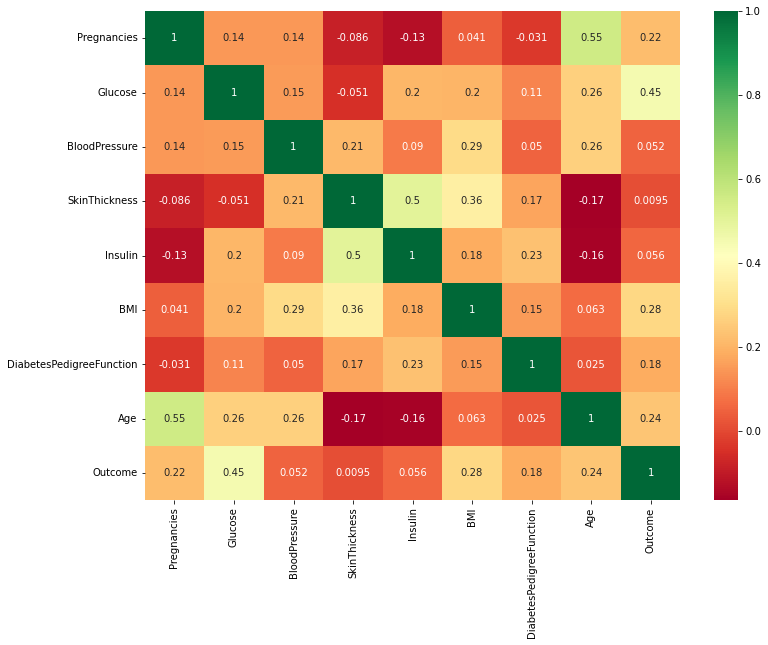

In [14]:
#correlations of each features in Data
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,9))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Final Data

In [15]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Split of Dependent variable and independent variables 

In [16]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

## Feature Scaling --> StandardScaler 
StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution.

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

In [18]:
y = y.to_numpy()

## Train and Test data split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

## Model Building

### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=64,criterion='gini',max_depth=None,  min_samples_split=6,
    min_samples_leaf=1,  min_weight_fraction_leaf=0.5, max_features='auto',  max_leaf_nodes=None,  min_impurity_decrease=0.4,
    bootstrap=True,  oob_score=False)

rf.fit( X_train, y_train)
predict_rf = rf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
existing_accuracy = accuracy_score(np.round(y_test),np.round(predict_rf))
print ('Existing Accuracy : ',existing_accuracy )

Existing Accuracy :  0.6857142857142857


## Convolution Nueral Network

In [22]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,Conv1D,Flatten,MaxPooling1D,BatchNormalization
from keras.models import Sequential
import keras
from keras import layers
from keras.models import load_model

In [23]:
%%time
model = Sequential()
model.add(Conv1D(212,(2),  activation='relu', input_shape=(8,1)))
model.add(MaxPooling1D((2), padding='same'))
model.add(BatchNormalization())

model.add(Conv1D(156,(2),  activation='relu'))
model.add(MaxPooling1D((2), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.80))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())

model.summary()
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",  metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=132,epochs=10,validation_data=(X_test,y_test))
model.save("model.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 212)            636       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 212)           0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 4, 212)           848       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 156)            66300     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 156)           0         
 1D)                                                             
                                                        

In [24]:
import tensorflow as tf

In [25]:
path = 'model.h5'
#model.save(path)
my_reloaded_model = tf.keras.models.load_model(path)


y_score = my_reloaded_model.predict(X_test)

Existing_Accuracy1= accuracy_score(y_test, np.round(y_score.argmax(axis=1)))
Existing_Accuracy1

0.6857142857142857

## Proposed  Cascaded Convolution Nueral Network

### Import Deep Learning Libraries

In [26]:
from keras import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers.convolutional import Conv2D , Conv1D
from keras.layers import Conv2D, Conv1D,MaxPooling2D, Reshape, Concatenate, Dropout , MaxPooling1D
from keras.layers.merge import concatenate
from keras.layers import Dense, Input
from keras.layers import Conv2D, Conv1D, MaxPooling2D, Reshape, Concatenate, Dropout , MaxPooling1D, Flatten
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,Conv1D,Flatten,MaxPooling1D,BatchNormalization
from keras.models import Sequential
import keras
from keras import layers
from keras.models import load_model

In [27]:
model_1D = Input((8, 1))
# 1 CNN
model_1D = Conv1D(512,kernel_size= 2 , strides=1, activation='relu')(model_1D)
model_1D = MaxPooling1D(pool_size= 1, strides=2)(model_1D)
model_1D=BatchNormalization()(model_1D)

model_1D = Conv1D(256,kernel_size= 2 , strides=1, activation='relu')(model_1D)
model_1D = MaxPooling1D(pool_size= 1, strides=2)(model_1D)
model_1D=BatchNormalization()(model_1D)


model_1D = Conv1D(124, kernel_size= 2 , strides=1, activation='relu')(model_1D)
model_1D = MaxPooling1D(pool_size= 1, strides=2)(model_1D)
model_1D=BatchNormalization()(model_1D)

model_1D = Dropout(0.2)(model_1D)



model_1D = Flatten()(model_1D)
model_1D = Dense(8 , activation='relu')(model_1D)




#2nd CNN
model_2D = Input((8, 1))


model_2D = Conv1D(512,kernel_size= 2 , strides=1, activation='relu')(model_2D)
model_2D = MaxPooling1D(pool_size=1, strides=1)(model_2D)
model_2D=BatchNormalization()(model_2D)


model_2D =  Conv1D(256,kernel_size= 2 , strides=1, activation='relu')(model_2D)
model_2D = MaxPooling1D(pool_size=1, strides=1)(model_2D)
model_2D=BatchNormalization()(model_2D)

model_2D = Dropout(0.2)(model_2D)


model_2D = Flatten()(model_2D)
model_2D = Dense(8 , activation='relu')(model_2D)

#Merge
merged = Concatenate()([model_1D, model_2D])
output = Dense(2, activation='softmax')(merged)

#fit

model_final = Model(inputs=[model_1D, model_2D], outputs=[output])

model_final.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_final.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 16)           0           ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 2)            34          ['concatenate[1][0]']        

In [28]:
history=model_final.fit([X_train,X_train],y_train, batch_size=5,epochs=50,validation_split=0.2)

model_final.save("model.h5")

Epoch 1/50
79/79 [==============================] - 0s 2ms/step - loss: 0.9974 - accuracy: 0.4194 - val_loss: 0.8313 - val_accuracy: 0.5510
Epoch 2/50
79/79 [==============================] - 0s 1ms/step - loss: 0.8580 - accuracy: 0.5090 - val_loss: 0.7352 - val_accuracy: 0.6224
Epoch 3/50
79/79 [==============================] - 0s 1ms/step - loss: 0.7619 - accuracy: 0.5754 - val_loss: 0.6655 - val_accuracy: 0.6735
Epoch 4/50
79/79 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.6189 - val_loss: 0.6186 - val_accuracy: 0.6939
Epoch 5/50
79/79 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.6598 - val_loss: 0.5844 - val_accuracy: 0.6939
Epoch 6/50
79/79 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.6931 - val_loss: 0.5599 - val_accuracy: 0.7449
Epoch 7/50
79/79 [==============================] - 0s 1ms/step - loss: 0.5814 - accuracy: 0.7110 - val_loss: 0.5406 - val_accuracy: 0.7653
Epoch 8/50
79/79 [==

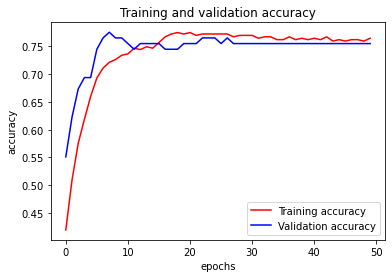

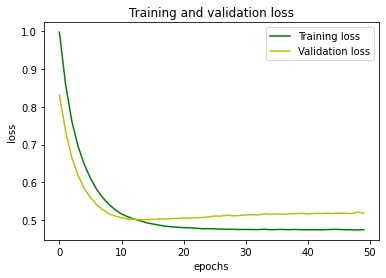

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig(' accuracy.png')
plt.show()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.legend()
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig(' loss.png')
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
proposed = model_final.predict([X_test,X_test])
proposed=np.argmax(proposed,axis=1)
accuracy = accuracy_score(np.round(y_test),np.round(proposed))
print ('Proposed Accuracy : ',accuracy )

Proposed Accuracy :  0.8142857142857143


## Cascased CNN with BayesianOptimization

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
warnings.filterwarnings("ignore")

In [32]:
def black_box_function(C):
    # C: SVC hyper parameter to optimize for.
    
    model_final.fit([X_train,X_train],y_train, batch_size=5,epochs=50,validation_split=0.2)
    proposed =model_final.predict([X_test,X_test])
    proposed=np.argmax(proposed,axis=1)
    f=accuracy_score(np.round(y_test),np.round(proposed))
    return f
# Set range of C to optimize for.
# bayes_opt requires this to be a dictionary.
pbounds = {"C": [0.1, 10]}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer = BayesianOptimization(f = black_box_function,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 5, n_iter = 10)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   |     C     |
-------------------------------------
Epoch 1/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7647 - val_loss: 0.5190 - val_accuracy: 0.7551
Epoch 2/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5199 - val_accuracy: 0.7551
Epoch 3/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7673 - val_loss: 0.5196 - val_accuracy: 0.7551
Epoch 4/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7596 - val_loss: 0.5200 - val_accuracy: 0.7551
Epoch 5/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7621 - val_loss: 0.5191 - val_accuracy: 0.7551
Epoch 6/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7621 - val_loss: 0.5196 - val_accuracy: 0.7551
Epoch 7/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4751 - acc

Epoch 16/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7647 - val_loss: 0.5209 - val_accuracy: 0.7551
Epoch 17/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7621 - val_loss: 0.5199 - val_accuracy: 0.7551
Epoch 18/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7621 - val_loss: 0.5184 - val_accuracy: 0.7551
Epoch 19/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7621 - val_loss: 0.5198 - val_accuracy: 0.7551
Epoch 20/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7621 - val_loss: 0.5207 - val_accuracy: 0.7551
Epoch 21/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5203 - val_accuracy: 0.7551
Epoch 22/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7647 - val_loss: 0.5197 - val_accuracy: 0.7551
Epoch 23/50
7

Epoch 24/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5195 - val_accuracy: 0.7551
Epoch 25/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7621 - val_loss: 0.5210 - val_accuracy: 0.7551
Epoch 26/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7621 - val_loss: 0.5204 - val_accuracy: 0.7551
Epoch 27/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7647 - val_loss: 0.5193 - val_accuracy: 0.7551
Epoch 28/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5220 - val_accuracy: 0.7551
Epoch 29/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7621 - val_loss: 0.5208 - val_accuracy: 0.7551
Epoch 30/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7621 - val_loss: 0.5224 - val_accuracy: 0.7551
Epoch 31/50
7

Epoch 32/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7596 - val_loss: 0.5206 - val_accuracy: 0.7551
Epoch 33/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7621 - val_loss: 0.5195 - val_accuracy: 0.7551
Epoch 34/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7621 - val_loss: 0.5208 - val_accuracy: 0.7551
Epoch 35/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7647 - val_loss: 0.5210 - val_accuracy: 0.7551
Epoch 36/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7596 - val_loss: 0.5217 - val_accuracy: 0.7551
Epoch 37/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.7647 - val_loss: 0.5218 - val_accuracy: 0.7551
Epoch 38/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7621 - val_loss: 0.5224 - val_accuracy: 0.7551
Epoch 39/50
7

Epoch 40/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7621 - val_loss: 0.5216 - val_accuracy: 0.7551
Epoch 41/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7673 - val_loss: 0.5191 - val_accuracy: 0.7551
Epoch 42/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7621 - val_loss: 0.5211 - val_accuracy: 0.7551
Epoch 43/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7673 - val_loss: 0.5209 - val_accuracy: 0.7551
Epoch 44/50
79/79 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7596 - val_loss: 0.5202 - val_accuracy: 0.7551
Epoch 45/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7621 - val_loss: 0.5204 - val_accuracy: 0.7551
Epoch 46/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7647 - val_loss: 0.5211 - val_accuracy: 0.7551
Epoch 47/50
7

Epoch 48/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7621 - val_loss: 0.5204 - val_accuracy: 0.7551
Epoch 49/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7647 - val_loss: 0.5196 - val_accuracy: 0.7551
Epoch 50/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7621 - val_loss: 0.5197 - val_accuracy: 0.7551
|  7        |  0.8143   |  9.652    |
Epoch 1/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7596 - val_loss: 0.5203 - val_accuracy: 0.7551
Epoch 2/50
79/79 [==============================] - 0s 965us/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5205 - val_accuracy: 0.7551
Epoch 3/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7673 - val_loss: 0.5170 - val_accuracy: 0.7551
Epoch 4/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7647 - val_loss: 0.5189 

Epoch 13/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7621 - val_loss: 0.5206 - val_accuracy: 0.7551
Epoch 14/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7596 - val_loss: 0.5221 - val_accuracy: 0.7551
Epoch 15/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7596 - val_loss: 0.5214 - val_accuracy: 0.7551
Epoch 16/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5215 - val_accuracy: 0.7551
Epoch 17/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7621 - val_loss: 0.5206 - val_accuracy: 0.7551
Epoch 18/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7647 - val_loss: 0.5205 - val_accuracy: 0.7551
Epoch 19/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5203 - val_accuracy: 0.7551
Epoch 20/50
7

Epoch 21/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7596 - val_loss: 0.5226 - val_accuracy: 0.7653
Epoch 22/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7596 - val_loss: 0.5211 - val_accuracy: 0.7551
Epoch 23/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7647 - val_loss: 0.5201 - val_accuracy: 0.7551
Epoch 24/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7621 - val_loss: 0.5204 - val_accuracy: 0.7551
Epoch 25/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7596 - val_loss: 0.5209 - val_accuracy: 0.7551
Epoch 26/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7596 - val_loss: 0.5218 - val_accuracy: 0.7653
Epoch 27/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7621 - val_loss: 0.5212 - val_accuracy: 0.7551
Epoch 28/50
7

Epoch 29/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7570 - val_loss: 0.5232 - val_accuracy: 0.7653
Epoch 30/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5199 - val_accuracy: 0.7551
Epoch 31/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7621 - val_loss: 0.5201 - val_accuracy: 0.7551
Epoch 32/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7621 - val_loss: 0.5190 - val_accuracy: 0.7551
Epoch 33/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7621 - val_loss: 0.5190 - val_accuracy: 0.7551
Epoch 34/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7647 - val_loss: 0.5182 - val_accuracy: 0.7551
Epoch 35/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5201 - val_accuracy: 0.7551
Epoch 36/50
7

Epoch 37/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5204 - val_accuracy: 0.7551
Epoch 38/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7673 - val_loss: 0.5175 - val_accuracy: 0.7551
Epoch 39/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.7647 - val_loss: 0.5177 - val_accuracy: 0.7551
Epoch 40/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7647 - val_loss: 0.5205 - val_accuracy: 0.7551
Epoch 41/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5198 - val_accuracy: 0.7551
Epoch 42/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5207 - val_accuracy: 0.7551
Epoch 43/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7621 - val_loss: 0.5199 - val_accuracy: 0.7551
Epoch 44/50
7

Epoch 45/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7647 - val_loss: 0.5207 - val_accuracy: 0.7551
Epoch 46/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7647 - val_loss: 0.5185 - val_accuracy: 0.7551
Epoch 47/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7647 - val_loss: 0.5189 - val_accuracy: 0.7551
Epoch 48/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7647 - val_loss: 0.5184 - val_accuracy: 0.7551
Epoch 49/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7647 - val_loss: 0.5199 - val_accuracy: 0.7551
Epoch 50/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5196 - val_accuracy: 0.7551
|  14       |  0.819    |  9.673    |
Epoch 1/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7621 - val_loss: 0.5193

## Optimal Hyper Parameter tuning using BayesianOptimization Algorithm

In [33]:
# Create the optimizer. The black box function to optimize is not
# specified here, as we will call that function directly later on.
optimizer = BayesianOptimization(f = None, 
                                 pbounds = {"C": [0.01, 10], 
                                            "degree": [1, 5]}, 
                                 verbose = 2, random_state = 1234)
# Specify the acquisition function (bayes_opt uses the term
# utility function) to be the upper confidence bounds "ucb".
# We set kappa = 1.96 to balance exploration vs exploitation.
# xi = 0.01 is another hyper parameter which is required in the
# arguments, but is not used by "ucb". Other acquisition functions
# such as the expected improvement "ei" will be affected by xi.
utility = UtilityFunction(kind = "ucb", kappa = 1.96, xi = 0.01)

Epoch 1/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7647 - val_loss: 0.5204 - val_accuracy: 0.7551
Epoch 2/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5206 - val_accuracy: 0.7551
Epoch 3/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7621 - val_loss: 0.5208 - val_accuracy: 0.7551
Epoch 4/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7621 - val_loss: 0.5232 - val_accuracy: 0.7551
Epoch 5/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7596 - val_loss: 0.5215 - val_accuracy: 0.7551
Epoch 6/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7621 - val_loss: 0.5210 - val_accuracy: 0.7551
Epoch 7/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5193 - val_accuracy: 0.7551
Epoch 8/50
79/79 [==

79/79 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7621 - val_loss: 0.5205 - val_accuracy: 0.7551
Epoch 18/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7673 - val_loss: 0.5206 - val_accuracy: 0.7551
Epoch 19/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7621 - val_loss: 0.5206 - val_accuracy: 0.7551
Epoch 20/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7621 - val_loss: 0.5209 - val_accuracy: 0.7551
Epoch 21/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7621 - val_loss: 0.5216 - val_accuracy: 0.7551
Epoch 22/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5201 - val_accuracy: 0.7551
Epoch 23/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7596 - val_loss: 0.5198 - val_accuracy: 0.7551
Epoch 24/50
79/79 [======

79/79 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7596 - val_loss: 0.5219 - val_accuracy: 0.7551
Epoch 34/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7647 - val_loss: 0.5207 - val_accuracy: 0.7551
Epoch 35/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7621 - val_loss: 0.5219 - val_accuracy: 0.7551
Epoch 36/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5224 - val_accuracy: 0.7551
Epoch 37/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7621 - val_loss: 0.5214 - val_accuracy: 0.7551
Epoch 38/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5206 - val_accuracy: 0.7551
Epoch 39/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5200 - val_accuracy: 0.7551
Epoch 40/50
79/79 [======

79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7647 - val_loss: 0.5206 - val_accuracy: 0.7551
Epoch 50/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7621 - val_loss: 0.5216 - val_accuracy: 0.7551
Epoch 1/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7621 - val_loss: 0.5222 - val_accuracy: 0.7551
Epoch 2/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7647 - val_loss: 0.5221 - val_accuracy: 0.7551
Epoch 3/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7647 - val_loss: 0.5232 - val_accuracy: 0.7551
Epoch 4/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7673 - val_loss: 0.5237 - val_accuracy: 0.7551
Epoch 5/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7621 - val_loss: 0.5218 - val_accuracy: 0.7551
Epoch 6/50
79/79 [============

79/79 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7596 - val_loss: 0.5196 - val_accuracy: 0.7551
Epoch 16/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7647 - val_loss: 0.5201 - val_accuracy: 0.7551
Epoch 17/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7673 - val_loss: 0.5190 - val_accuracy: 0.7551
Epoch 18/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7621 - val_loss: 0.5232 - val_accuracy: 0.7653
Epoch 19/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7570 - val_loss: 0.5214 - val_accuracy: 0.7551
Epoch 20/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7621 - val_loss: 0.5207 - val_accuracy: 0.7551
Epoch 21/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7621 - val_loss: 0.5222 - val_accuracy: 0.7653
Epoch 22/50
79/79 [======

79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7673 - val_loss: 0.5191 - val_accuracy: 0.7551
Epoch 32/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7647 - val_loss: 0.5198 - val_accuracy: 0.7551
Epoch 33/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7621 - val_loss: 0.5199 - val_accuracy: 0.7551
Epoch 34/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7647 - val_loss: 0.5190 - val_accuracy: 0.7551
Epoch 35/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7673 - val_loss: 0.5205 - val_accuracy: 0.7551
Epoch 36/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7621 - val_loss: 0.5196 - val_accuracy: 0.7551
Epoch 37/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7621 - val_loss: 0.5188 - val_accuracy: 0.7551
Epoch 38/50
79/79 [======

79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5213 - val_accuracy: 0.7551
Epoch 48/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7621 - val_loss: 0.5212 - val_accuracy: 0.7551
Epoch 49/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7673 - val_loss: 0.5227 - val_accuracy: 0.7551
Epoch 50/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7673 - val_loss: 0.5216 - val_accuracy: 0.7551
Epoch 1/50
79/79 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5208 - val_accuracy: 0.7551
Epoch 2/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7621 - val_loss: 0.5210 - val_accuracy: 0.7551
Epoch 3/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5218 - val_accuracy: 0.7551
Epoch 4/50
79/79 [==========

79/79 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7621 - val_loss: 0.5202 - val_accuracy: 0.7551
Epoch 14/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7621 - val_loss: 0.5206 - val_accuracy: 0.7551
Epoch 15/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7621 - val_loss: 0.5204 - val_accuracy: 0.7551
Epoch 16/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7621 - val_loss: 0.5201 - val_accuracy: 0.7551
Epoch 17/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7621 - val_loss: 0.5219 - val_accuracy: 0.7551
Epoch 18/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7647 - val_loss: 0.5208 - val_accuracy: 0.7551
Epoch 19/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7596 - val_loss: 0.5211 - val_accuracy: 0.7551
Epoch 20/50
79/79 [======

79/79 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7621 - val_loss: 0.5202 - val_accuracy: 0.7551
Epoch 30/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5199 - val_accuracy: 0.7551
Epoch 31/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5206 - val_accuracy: 0.7551
Epoch 32/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7621 - val_loss: 0.5197 - val_accuracy: 0.7551
Epoch 33/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5200 - val_accuracy: 0.7551
Epoch 34/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7673 - val_loss: 0.5194 - val_accuracy: 0.7551
Epoch 35/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7621 - val_loss: 0.5197 - val_accuracy: 0.7551
Epoch 36/50
79/79 [======

79/79 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7621 - val_loss: 0.5211 - val_accuracy: 0.7551
Epoch 46/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.7621 - val_loss: 0.5224 - val_accuracy: 0.7551
Epoch 47/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7545 - val_loss: 0.5215 - val_accuracy: 0.7551
Epoch 48/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7621 - val_loss: 0.5210 - val_accuracy: 0.7551
Epoch 49/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7621 - val_loss: 0.5237 - val_accuracy: 0.7653
Epoch 50/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.7621 - val_loss: 0.5230 - val_accuracy: 0.7653
Epoch 1/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7621 - val_loss: 0.5213 - val_accuracy: 0.7551
Epoch 2/50
79/79 [========

79/79 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7673 - val_loss: 0.5207 - val_accuracy: 0.7551
Epoch 12/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4746 - accuracy: 0.7621 - val_loss: 0.5207 - val_accuracy: 0.7551
Epoch 13/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7621 - val_loss: 0.5202 - val_accuracy: 0.7551
Epoch 14/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.7621 - val_loss: 0.5217 - val_accuracy: 0.7551
Epoch 15/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7698 - val_loss: 0.5206 - val_accuracy: 0.7551
Epoch 16/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7673 - val_loss: 0.5198 - val_accuracy: 0.7551
Epoch 17/50
79/79 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7596 - val_loss: 0.5217 - val_accuracy: 0.7551
Epoch 18/50
79/79 [======

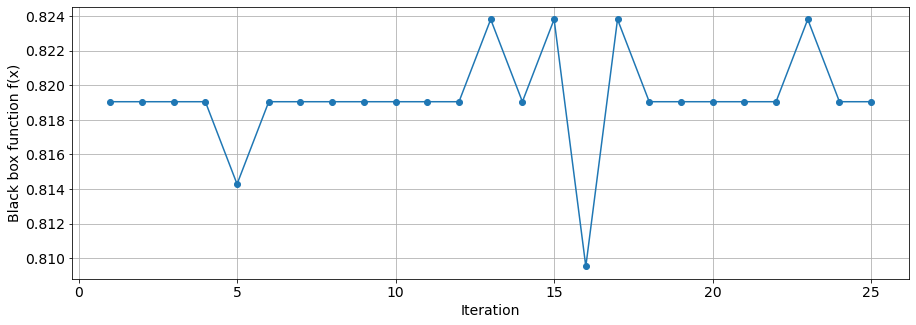

In [34]:
# We want to optimize both C and degree simultaneously.
def black_box_function(C, degree):
    model_final.fit([X_train,X_train],y_train, batch_size=5,epochs=50,validation_split=0.2)
    proposed =model_final.predict([X_test,X_test])
    proposed=np.argmax(proposed,axis=1)
    f=accuracy_score(np.round(y_test),np.round(proposed))
    return f
# Optimization for loop.
for i in range(25):
    # Get optimizer to suggest new parameter values to try using the
    # specified acquisition function.
    next_point = optimizer.suggest(utility)
    # Force degree from float to int.
    next_point["degree"] = int(next_point["degree"])
    # Evaluate the output of the black_box_function using 
    # the new parameter values.
    target = black_box_function(**next_point)
    try:
        # Update the optimizer with the evaluation results. 
        # This should be in try-except to catch any errors!
        optimizer.register(params = next_point, target = target)
    except:
        pass
print("Best result: {}; f(x) = {:.3f}.".format(optimizer.max["params"], optimizer.max["target"]))
plt.figure(figsize = (15, 5))
plt.plot(range(1, 1 + len(optimizer.space.target)), optimizer.space.target, "-o")
plt.grid(True)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Black box function f(x)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [35]:
Accuracy=np.round(optimizer.max["target"], 2)
Accuracy

0.82

## Classification Report

In [40]:
from sklearn.metrics import accuracy_score
proposed = model_final.predict([X_test,X_test])
proposed=np.argmax(proposed,axis=1)

from sklearn.metrics import classification_report

print(classification_report(y_test, np.round(proposed)))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87       144
           1       0.77      0.61      0.68        66

    accuracy                           0.82       210
   macro avg       0.80      0.76      0.78       210
weighted avg       0.81      0.82      0.81       210



## Comparing All Models

In [36]:
print('Proposed Accuracy ',Accuracy)
print('Existing Accuracy ',existing_accuracy)
print('Existing Accuracy2 ',Existing_Accuracy1)

Proposed Accuracy  0.82
Existing Accuracy  0.6857142857142857
Existing Accuracy2  0.6857142857142857


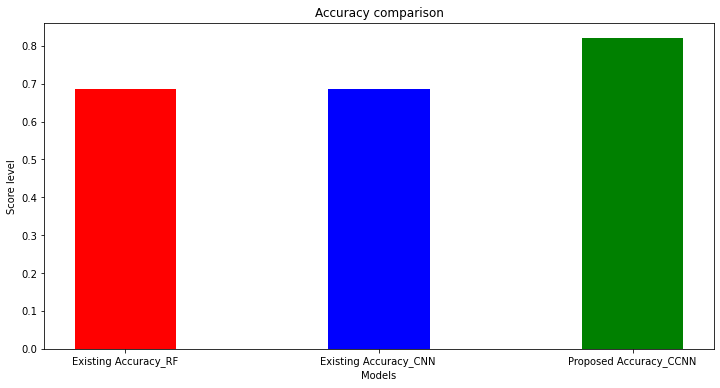

In [37]:
data = {'Existing Accuracy_RF':existing_accuracy,'Existing Accuracy_CNN ':Existing_Accuracy1, 'Proposed Accuracy_CCNN':Accuracy}

label = list(data.keys())
model = list(data.values())
color = ['red','blue','green']  
fig = plt.figure(figsize = (12, 6))
 
plt.bar(label, model, color =color,width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Score level")
plt.title("Accuracy comparison")
plt.show()